<a href="https://colab.research.google.com/github/happyKJE/data-analysis-notebooks/blob/main/%EC%8B%9C%ED%97%98%EC%84%B1%EC%A0%81_%EC%B2%98%EB%A6%AC%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# feature engineering이란

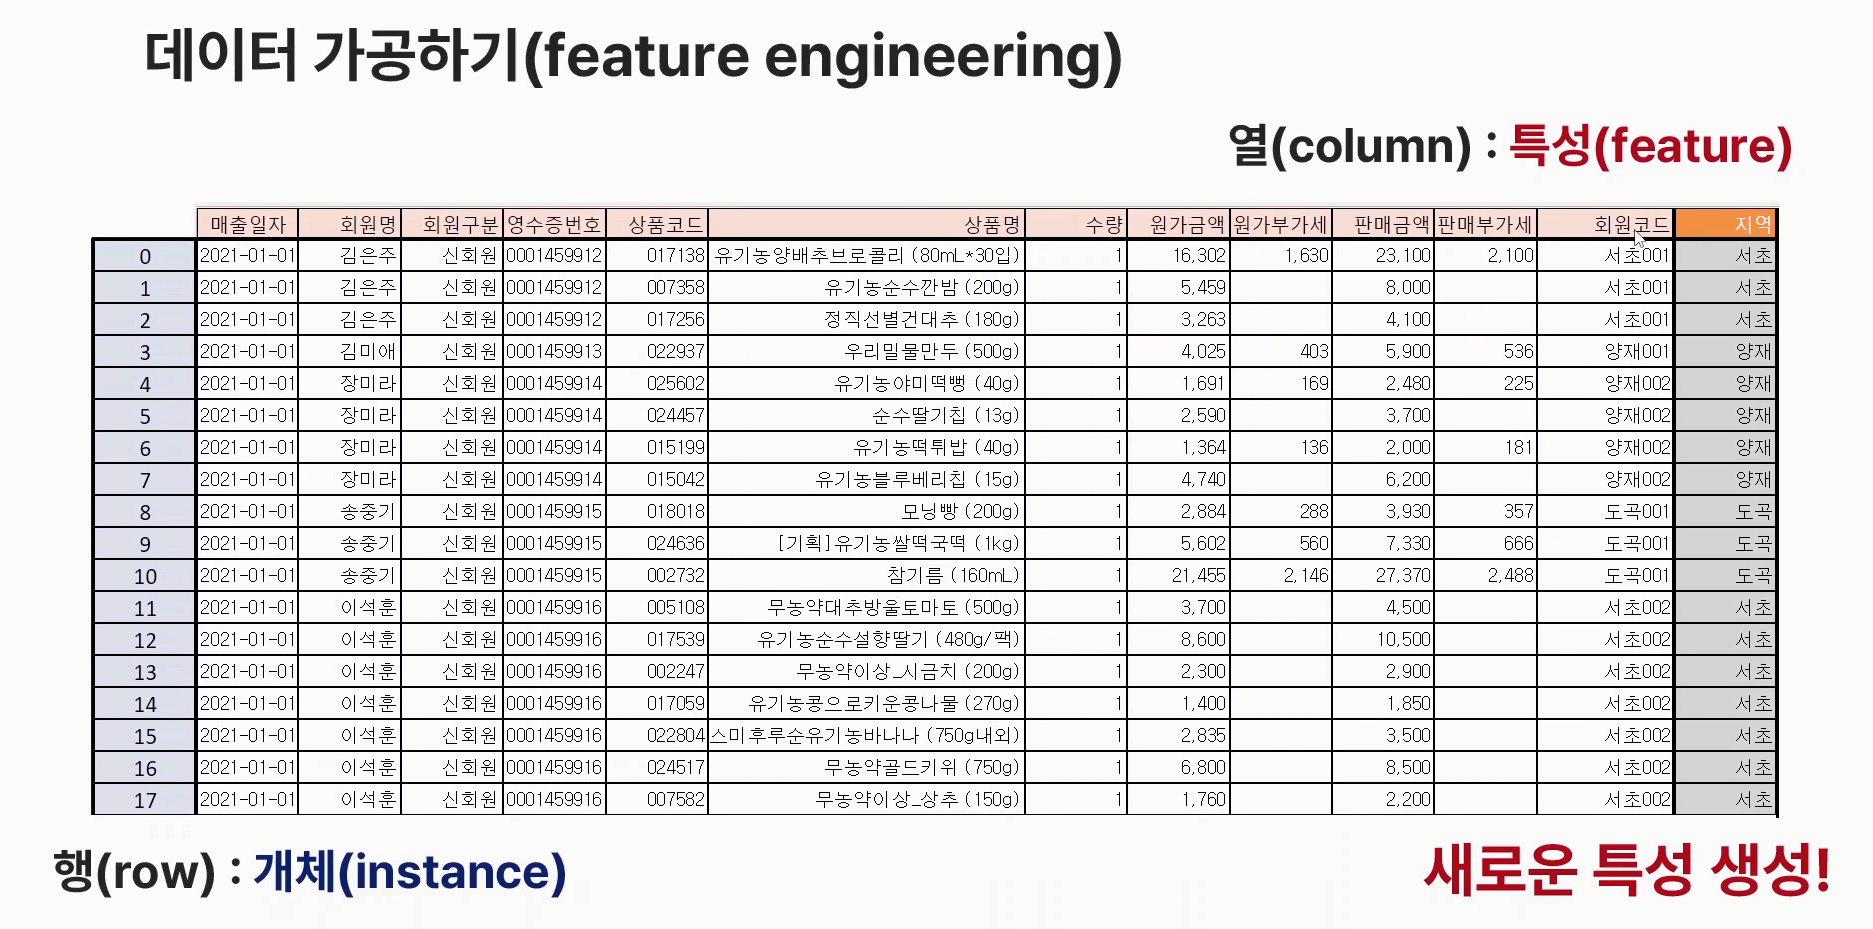

> 기존 열 데이터를 가공하여 더 유용한 &필요한 특성을 가진 열 데이터를 만드는 과정








# rank 함수

**df.rank(method='average'. ascending=*True*)**

> 데이터 프레임이나 시리즈의 순위를 매기는 함수



---
**method**
> 동점자 처리 방식을 지정하는 인자

* average: 평균 순위
* min: 최소 순위
* max: 최대 순위
* first: 출현 순서에 따라 순위 부여
* dense: ‘min’ 과 같지만 동점자가 여러명 있어도 다음 순위가 1을 더해서 부여한다

**ascending**
>오름차순과 내림차순을 결정하는 인자, 기본값은 오름차순 (True)






In [161]:
import pandas as pd
data = [['송중기', 91, 82, 17], ['권보아', 82, 95, 17],
        ['김나현', 71, 95, 18], ['박효신', 90, 72, 18],
        ['김선미', 80, 72, 19], ['강승주', 78, 95, 19]]
df = pd.DataFrame(data, columns=['이름', '영어', '국어', '나이'])
df1 = df.copy()
df

,이름,영어,국어,나이
0,송중기,91,82,17
1,권보아,82,95,17
2,김나현,71,95,18
3,박효신,90,72,18
4,김선미,80,72,19
5,강승주,78,95,19


In [162]:
df1['영어등수'] = df1['영어'].rank(ascending=False)
df1

,이름,영어,국어,나이,영어등수
0,송중기,91,82,17,1.0
1,권보아,82,95,17,3.0
2,김나현,71,95,18,6.0
3,박효신,90,72,18,2.0
4,김선미,80,72,19,4.0
5,강승주,78,95,19,5.0


In [163]:
# 동점자 다르게 국어 등수 처리하기
df1['average'] = df1['국어'].rank()
df1['min'] = df1['국어'].rank(method='min')
df1['max'] = df1['국어'].rank(method='max')
df1['first'] = df1['국어'].rank(method='first')
df1['dense'] = df1['국어'].rank(method='dense')
df1

,이름,영어,국어,나이,영어등수,average,min,max,first,dense
0,송중기,91,82,17,1.0,3.0,3.0,3.0,3.0,2.0
1,권보아,82,95,17,3.0,5.0,4.0,6.0,4.0,3.0
2,김나현,71,95,18,6.0,5.0,4.0,6.0,5.0,3.0
3,박효신,90,72,18,2.0,1.5,1.0,2.0,1.0,1.0
4,김선미,80,72,19,4.0,1.5,1.0,2.0,2.0,1.0
5,강승주,78,95,19,5.0,5.0,4.0,6.0,6.0,3.0


# 자료형 바꾸기(astype)

>**astype**

데이터 프레임이나 시리즈의 자료형을 바꾸는 함수

---

  **dtype**

* 자료형을 지정하는 인자. dtype을 입력하면 된다
* 특정 열에만 적용하고 싶을 경우 열의 레이블과 자료형을 딕셔너리로 넣으면 된다

In [10]:
import pandas as pd
data = [[8.2, 9, '17'], [7.1, 9, '18'], [9.3, 7, '18'], [7.8, 7, '19']]
df = pd.DataFrame(data, columns=['A', 'B', 'C'])
df1 = df.copy() # df와 똑같은 데이터프레임을 복사해 df1으로 선언
df

,A,B,C
0,8.2,9,17
1,7.1,9,18
2,9.3,7,18
3,7.8,7,19


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       4 non-null      float64
 1   B       4 non-null      int64  
 2   C       4 non-null      object 
dtypes: float64(1), int64(1), object(1)
memory usage: 228.0+ bytes


In [12]:
# 데이터 프레임의 자료형을 문자열로 바꾸기
df1.astype('str').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       4 non-null      object
 1   B       4 non-null      object
 2   C       4 non-null      object
dtypes: object(3)
memory usage: 228.0+ bytes


In [13]:
# 데이터 프레임의 자료형을 정수로 바꾸기
df1.astype('int').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       4 non-null      int64
 1   B       4 non-null      int64
 2   C       4 non-null      int64
dtypes: int64(3)
memory usage: 228.0 bytes


In [14]:
# 특정열의 자료형 바꾸기
df.astype({'C':'int'}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       4 non-null      float64
 1   B       4 non-null      int64  
 2   C       4 non-null      int64  
dtypes: float64(1), int64(2)
memory usage: 228.0 bytes


In [15]:
# 여러열의 자료형 바꾸기
df.astype({'A': 'str', 'C':'int'}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       4 non-null      object
 1   B       4 non-null      int64 
 2   C       4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 228.0+ bytes


In [16]:
import pandas as pd
pd.options.display.max_rows = 6
url = 'https://raw.githubusercontent.com/panda-kim/pandas/main/ch04.csv'
df_ex1 = pd.read_csv(url)
df_ex1

,이름,점수
0,노성빈,22
1,문주용,52
2,최태주,71
...,...,...
97,지도훈,24
98,류형석,41
99,유남길,67


In [17]:
# 등수 열 생성
df_ex1['등수']= df_ex1['점수'].rank(method='min', ascending=False).astype('int')
df_ex1

,이름,점수,등수
0,노성빈,22,94
1,문주용,52,49
2,최태주,71,19
...,...,...,...
97,지도훈,24,90
98,류형석,41,69
99,유남길,67,24


# 데이터 프레임 필터링하기 (불리언 인덱싱)

>불리언 인덱싱(boolean indexing 이란?

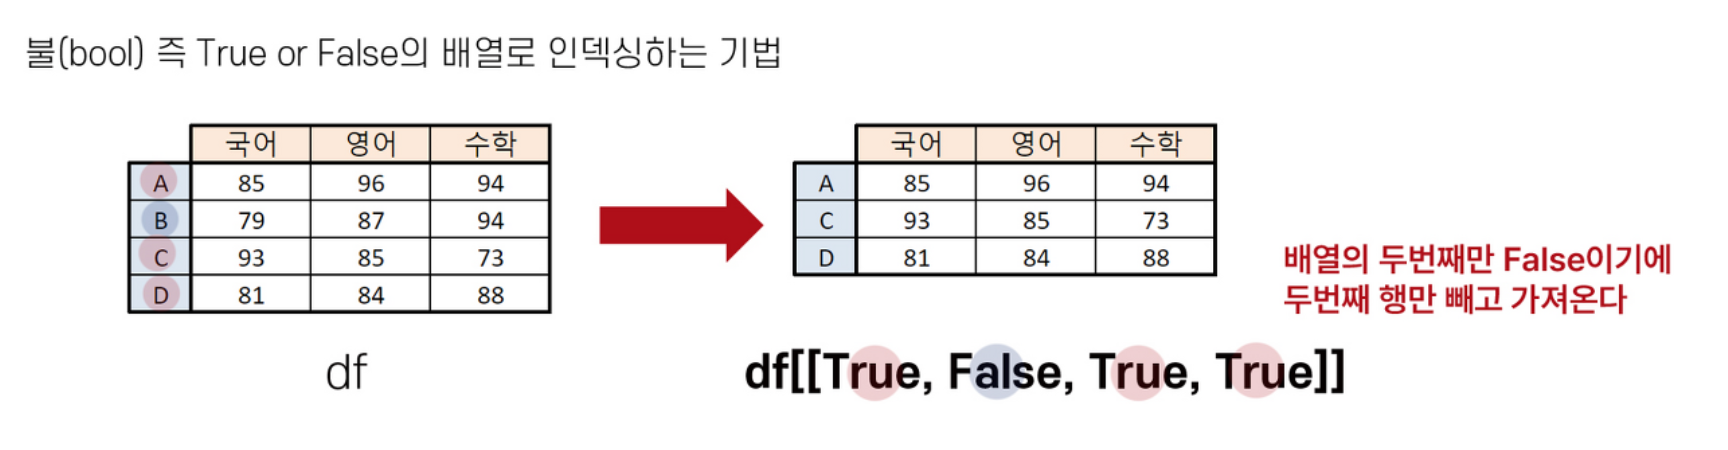

True or False의 배열로 인덱싱하는 기법

* bool 배열로 인덱싱 함
* 불리언 인덱싱에 들어가는 배열은 리스트가 아니라 시리즈로 가능
* 시리즈느 단순 연산으로 쉽게 불리언 시리즈로 만들 수 있으므로 이 특성과 합쳐져 불리언 인덱싱은 판다스의 필터링으로 쓰임

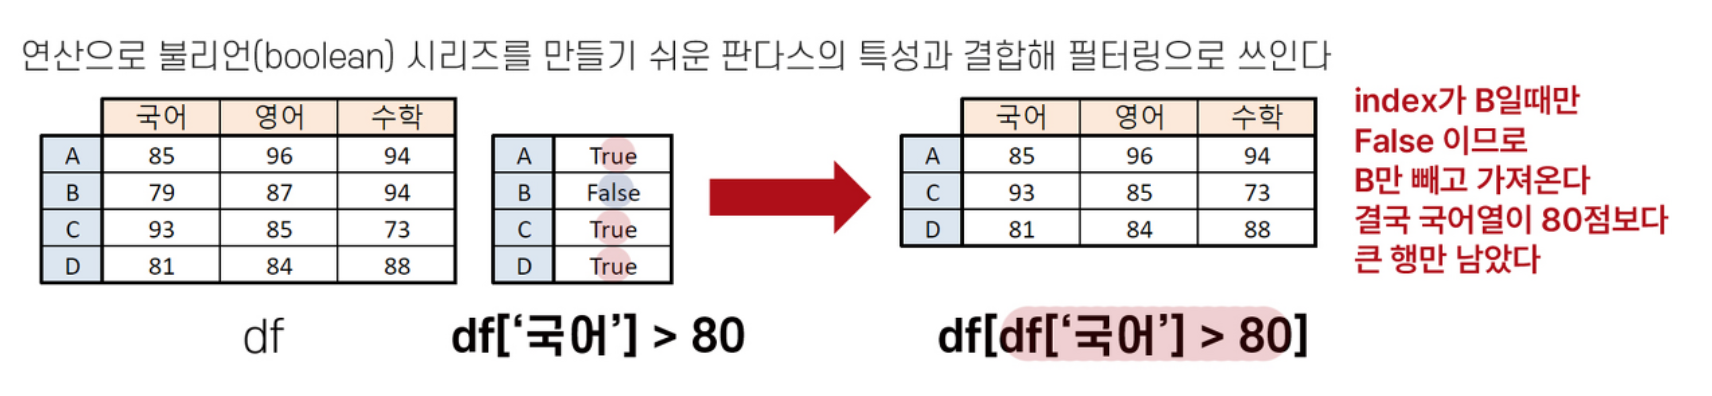

위 그림에서 보이는 조건문은
df['국어'] > 80
그저 True와 False로 이루어진 시리즈이다

명령어가 아님에 주의하고 시리즈이기 때문에 변수로 지정도 가능하다

cond1 = df['국어'] > 80
조건문이 쓰이는 자리에 변수 cond1을 대신 입력할 수 있다.

복잡한 조건문일때 조건문을 변수로 지정하면 코드가 간결해지므로 변수로 지정해 사용하자


In [18]:
import pandas as pd

data = [[85, 96, 94], [79, 87, 94], [93, 85, 73], [81, 84, 88]]
df = pd.DataFrame(data, index=list('ABCD'), columns=['국어', '영어', '수학'])
df

,국어,영어,수학
A,85,96,94
B,79,87,94
C,93,85,73
D,81,84,88


In [19]:
# 행을 불리언 인덱싱 (대괄호 인덱싱이나 loc 인덱싱으로 가능)
df.loc[[True, False, True, True]]

,국어,영어,수학
A,85,96,94
C,93,85,73
D,81,84,88


In [20]:
df[[True, False, True, True]]

,국어,영어,수학
A,85,96,94
C,93,85,73
D,81,84,88


In [21]:
# 열을 불리언 인덱싱 (loc 인덱싱으로 가능)
df.loc[:, [True, False, True]]

,국어,수학
A,85,94
B,79,94
C,93,73
D,81,88


In [23]:
df['국어'] > 80

,국어
A,True
B,False
C,True
D,True


In [24]:
# 국어점수가 80점보다 큰 사람만 필터링
df[df['국어'] > 80]

,국어,영어,수학
A,85,96,94
C,93,85,73
D,81,84,88


In [25]:
# 평균이 85점 이상인 사람만 필터링
df[df.mean(axis=1) >= 85]

,국어,영어,수학
A,85,96,94
B,79,87,94


In [26]:
# 2차원 배열로 불리언 인덱싱을 할때
df[df > 80]

,국어,영어,수학
A,85.0,96,94.0
B,NaN,87,94.0
C,93.0,85,NaN
D,81.0,84,88.0


In [27]:
import pandas as pd
pd.options.display.max_rows = 6 # 판다스 버전업에 따라 6행만 출력의 바뀐 코드
url = 'https://raw.githubusercontent.com/panda-kim/pandas/main/ch04.csv'
df_ex1 = pd.read_csv(url)
df_ex1['등수'] = df_ex1['점수'].rank(method='min', ascending=False).astype('int')
df_ex1

,이름,점수,등수
0,노성빈,22,94
1,문주용,52,49
2,최태주,71,19
...,...,...,...
97,지도훈,24,90
98,류형석,41,69
99,유남길,67,24


In [28]:
# 1등(공동1등 포함)의 명단 추출하기
df_ex1.loc[df_ex1['등수'] == 1, '이름']

,이름
35,구은탁
37,민일택
93,문지용


In [ ]:
# 40점 이하는 낙제점. 낙제가 아닌 성적만 필터링
df_ex1[df_ex1['점수'] > 40]

# 조건에 따라 값 부여하기(불리언 마스킹)

>불리언 마스킹(boolean masking)이란?

if문 처럼 참, 거짓에(boolean) 따라 값을 부여하는는 것(masking)

---

> pandas mask

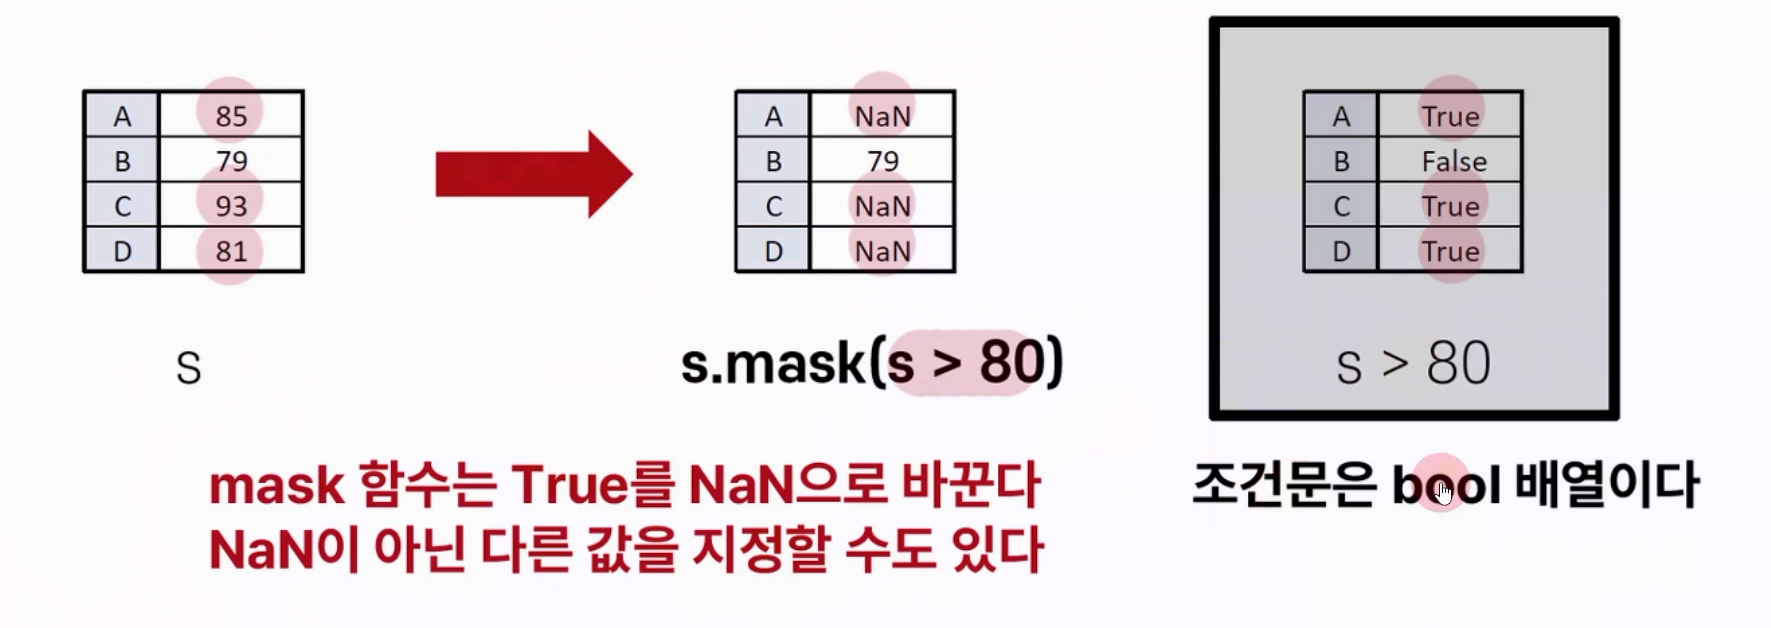

* True or False에 따라 값을 씨우는 함수

**cond**

조건문처럼 작동하는 True 또는 False의 배열을 입력받는 인자 (mask 함수는 True일 때의 값을 바꿈)

**other**
조건문이 True일 때 바꿀 값을 지정하는 인자. 기본값은 NaN

In [29]:
import pandas as pd
list1 = [85, 79, 93, 81]
data = [[85, 96, 94], [79, 87, 94], [93, 85, 73], [81, 84, 88]]
df = pd.DataFrame(data, index=list('ABCD'), columns=['국어', '영어', '수학'])
df

,국어,영어,수학
A,85,96,94
B,79,87,94
C,93,85,73
D,81,84,88


In [32]:
result = []
for i in list1:
  if i > 80:
    result.append('합격')
  else:
    result.append('불합격')
print(list1)
print(result)
['합격' if i > 80 else '불합격' for i in list1]

[85, 79, 93, 81]
['합격', '불합격', '합격', '합격']


['합격', '불합격', '합격', '합격']

In [33]:
cond1 = df > 80
df.mask(cond1, '합격')

,국어,영어,수학
A,합격,합격,합격
B,79,합격,합격
C,합격,합격,73
D,합격,합격,합격


In [34]:
df.mask(cond1, '합격').mask(~cond1, '불합격')

,국어,영어,수학
A,합격,합격,합격
B,불합격,합격,합격
C,합격,합격,불합격
D,합격,합격,합격


In [35]:
# 시리즈에 mask 함수 적용해 국어열 수정하기
df1 = df.copy()
cond2 = df1['국어'] <= 80
df1['국어'] = df1['국어'].mask(cond2, '불합격')
df1

,국어,영어,수학
A,85,96,94
B,불합격,87,94
C,93,85,73
D,81,84,88


In [36]:
df1 = df.copy()
df1['국어'] = df1['국어'].mask(cond2, '불합격').mask(~cond2, '합격')
df1

,국어,영어,수학
A,합격,96,94
B,불합격,87,94
C,합격,85,73
D,합격,84,88


In [37]:
df1 = df.copy()
df1['국어성적'] = df1['국어'].mask(cond2, '불합격').mask(~cond2, '합격')
df1

,국어,영어,수학,국어성적
A,85,96,94,합격
B,79,87,94,불합격
C,93,85,73,합격
D,81,84,88,합격


**np.where**

> 불리언 마스킹을 하는 numpy함수, 참일때와 거짓일 때의 값을 동시에 부여할 수 있다.

>결과는 array로 반환.

In [38]:
import numpy as np
df1 = df.copy()
df1['국어성적'] = np.where(cond2, '불합격','합격')
df1

,국어,영어,수학,국어성적
A,85,96,94,합격
B,79,87,94,불합격
C,93,85,73,합격
D,81,84,88,합격


In [39]:
# 영어점수가 국어점수보다 높을 경우, 국어점수를 영어점수로 masking
df1 = df.copy()
cond3 = df1['영어'] > df1['국어']
df1['국어'] = df1['국어'].mask(cond3, df1['영어'])
df1

,국어,영어,수학
A,96,96,94
B,87,87,94
C,93,85,73
D,84,84,88


In [40]:
import pandas as pd
pd.options.display.max_rows = 6 # 판다스 버전업에 따라 6행만 출력의 바뀐 코드
url = 'https://raw.githubusercontent.com/panda-kim/pandas/main/ch04.csv'
df_ex1 = pd.read_csv(url)
df_ex1['등수'] = df_ex1['점수'].rank(method='min', ascending=False).astype('int')
df_ex1

,이름,점수,등수
0,노성빈,22,94
1,문주용,52,49
2,최태주,71,19
...,...,...,...
97,지도훈,24,90
98,류형석,41,69
99,유남길,67,24


In [42]:
# 점수가 40이하면 낙제 40초과면 패스인 비고 열을 만들자
cond=df_ex1['점수']>40
df_ex1['비고'] = df_ex1['점수'].mask(cond,'패스').mask(~cond,'낙제')
df_ex1

,이름,점수,등수,비고
0,노성빈,22,94,낙제
1,문주용,52,49,패스
2,최태주,71,19,패스
...,...,...,...,...
97,지도훈,24,90,낙제
98,류형석,41,69,패스
99,유남길,67,24,패스


In [44]:
df_ex1['비고']=np.where(cond,'패스','낙제')
df_ex1

,이름,점수,등수,비고
0,노성빈,22,94,낙제
1,문주용,52,49,패스
2,최태주,71,19,패스
...,...,...,...,...
97,지도훈,24,90,낙제
98,류형석,41,69,패스
99,유남길,67,24,패스


#범주화해서 학점 매기기(cut)

학점과 같이 구간을 나눠서 특정 값을 부여하는 것은 **merge_asof** 함수나 **mask** 함수로 가능하지만 코드가 복잡해짐

* 그럴 때 **cut 함수**를 사용하면 손쉽게 그룹을 나눠 범주화해서 학점을 매길 수 있다

> pandas cut

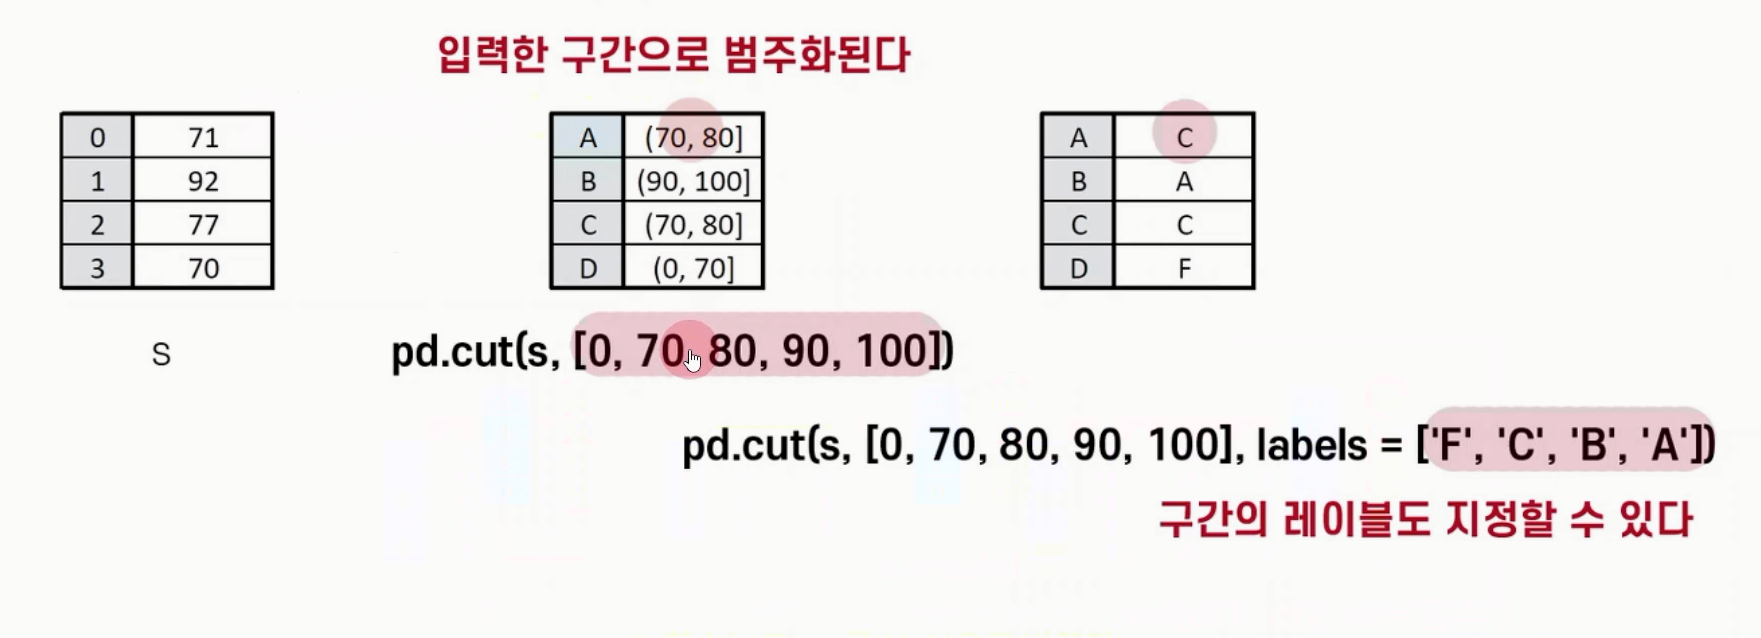

숫자와 같은 데이터를 구간별로 나눠서 범주화(categorization)하는 함수

**x** (인수는 배열)

* 구간을 나눌 배열을 입력받는 인자. 반드시 1차원이어야 한다

**bins** (인수는 정수, 순서의 배열)

* 구간을 나누는 기준을 입력받는 인자

    * 정수 : 정수만큼의 균등한 구간으로 분할한다
    * 순서의 배열 : ex1) [0, 20, 40, 60] 이라면 0 ~ 20, 20 ~ 40, 40 ~ 60 까지의 3개의 구간으로 분할한다

**right** (인수는 bool / 기본값은 True)

* 구간에서 우측 경계를 포함할지 여부를 결정하는 인자

    * ex1의 경우에 True라면 우측 경계를 해당 구간에 포함하므로 0초과 20이하, 20초과 40이하, 40초과 60이하로 분할한다

**labels** (인수는 배열 또는 False / 기본값은 None)

* 구간의 레이블을 지정하는 인자. False는 가장 왼쪽 구간부터 0, 1, 2, 3... 으로 레이블을 부여한다

    * 기본값은 구간의 경계를 구간의 레이블로 부여한다

    * ex1의 경우라면 (0, 20], (20, 40], (40. 60] 으로 부여한다

    * 반드시 bins 인자로 나누어진 구간수와 같아야 한다



In [45]:
import pandas as pd
s = pd.Series([71, 92, 77, 70])
s

,0
0,71
1,92
2,77
3,70


In [46]:
pd.cut(s, [0, 70, 80, 90, 100])
# 소괄호가 불포함, 대괄호가 포함

,0
0,"(70, 80]"
1,"(90, 100]"
2,"(70, 80]"
3,"(0, 70]"


In [47]:
pd.cut(s, [0, 70, 80, 90, 100], labels=False)

,0
0,1
1,3
2,1
3,0


In [48]:
pd.cut(s,[0, 70, 80, 90, 100], labels=['F','C','B','A'])

,0
0,C
1,A
2,C
3,F


In [49]:
import pandas as pd
pd.options.display.max_rows = 6 # 판다스 버전업에 따라 6행만 출력의 바뀐 코드
url = 'https://raw.githubusercontent.com/panda-kim/pandas/main/ch04.csv'
df_ex1 = pd.read_csv(url)
df_ex1['등수'] = df_ex1['점수'].rank(method='min', ascending=False).astype('int')
cond1 = df_ex1['점수'] > 40
df_ex1['비고'] = df_ex1['점수'].mask(cond1, '패스').mask(~cond1, '낙제')
df_ex1

,이름,점수,등수,비고
0,노성빈,22,94,낙제
1,문주용,52,49,패스
2,최태주,71,19,패스
...,...,...,...,...
97,지도훈,24,90,낙제
98,류형석,41,69,패스
99,유남길,67,24,패스


In [51]:
df_ex1['학점']=pd.cut(df_ex1['점수'],bins=[0,40,50,60,70,80], labels=['F','D','C','B','A'])
df_ex1

,이름,점수,등수,비고,학점
0,노성빈,22,94,낙제,F
1,문주용,52,49,패스,C
2,최태주,71,19,패스,A
...,...,...,...,...,...
97,지도훈,24,90,낙제,F
98,류형석,41,69,패스,D
99,유남길,67,24,패스,B


# category 자료형

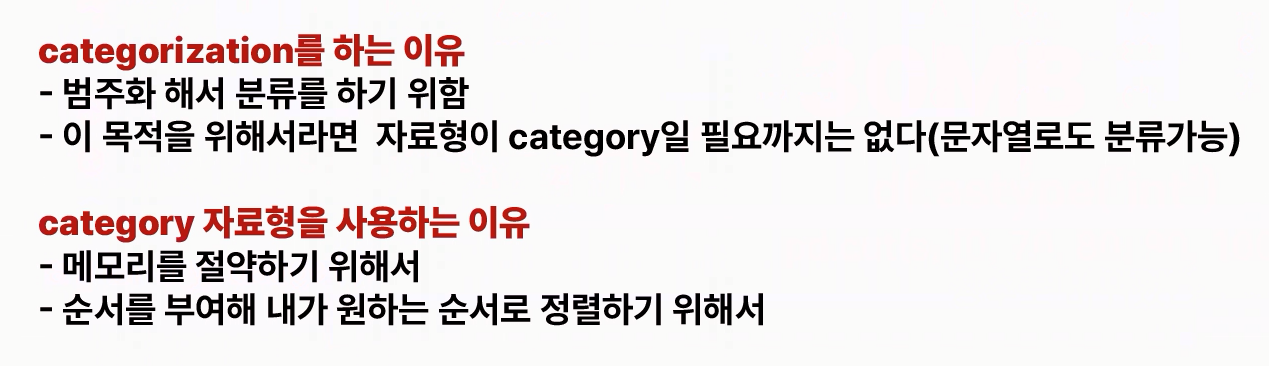

In [52]:
import pandas as pd
pd.options.display.max_rows = 6
s = pd.Series(['S', 'M', 'XL']*10000000)
s

,0
0,S
1,M
2,XL
...,...
29999997,S
29999998,M
29999999,XL


In [53]:
# s의 메모리 사용량 확인
s.memory_usage()

240000132

In [56]:
s.astype('category').memory_usage()

30000264

In [57]:
s1 = pd.Series(pd.Categorical(s, categories=['S','M','XL'], ordered=True))
s1

,0
0,S
1,M
2,XL
...,...
29999997,S
29999998,M
29999999,XL


# 빈도수 파악하기 (value_counts 및 시각화)

> pandas value_counts

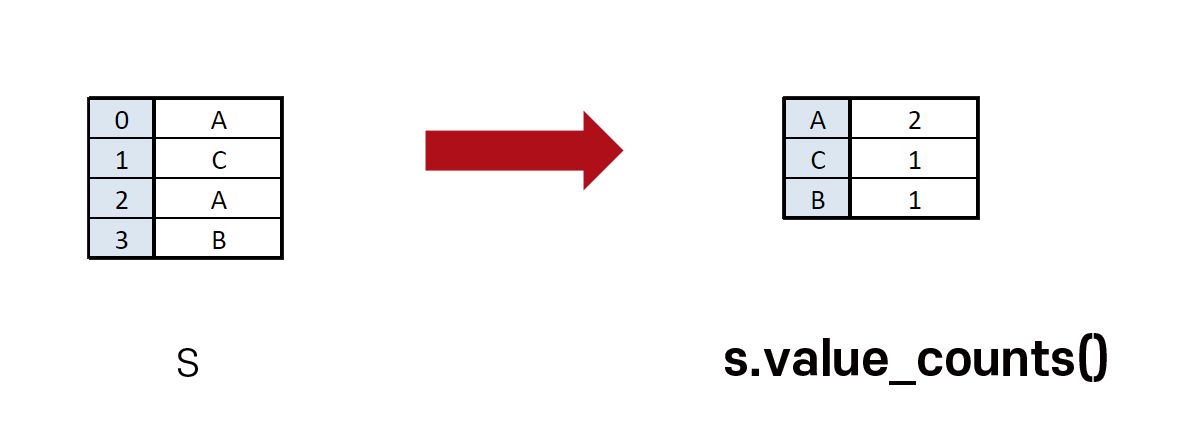

데이터 프레임이나 시리즈의 고유값의 개수를 파악하는 함수

시리즈에 적용할 때는 아래와 같다

**`s.value_counts(normalize=False, sort=True, ascending=False)`**

**normalize** (인수는 bool / 기본값은 False)

True일때는 표준화해서 비율로 보여준다

**sort** (인수는 bool / 기본값은 True)

빈도에 따라 정렬한다

**ascending** (인수는 bool / 기본값은 False)

정렬 방식을 결정하는 인자, 기본값은 내림차순



---



데이터 프레임에 적용할 때는 아래와 같다

**`df.value_counts(subset=None, normalize=False, sort=True, ascending=False)`**

**subset** (인수는 레이블 / 기본값은 None)

고유값의 개수를 파악할 열을 지정하는 인자

그외의 인자는 시리즈에 적용할 때와 동일하다

In [58]:
import pandas as pd
data = [['A', 'a'], ['A', 'b'], ['C', 'a'], ['B', 'b'], ['A', 'a']]
df = pd.DataFrame(data, columns=['col1', 'col2'])
df

,col1,col2
0,A,a
1,A,b
2,C,a
3,B,b
4,A,a


In [83]:
df['col1'].value_counts()

,count
col1,
A,3
C,1
B,1


In [84]:
df['col1'].value_counts(normalize=True)

,proportion
col1,
A,0.6
C,0.2
B,0.2


In [91]:
df.value_counts(['col1','col2'])

col1  col2
A     a       2
      b       1
B     b       1
C     a       1
Name: count, dtype: int64

In [89]:
df.value_counts(['col1','col2'], normalize=True)

col1  col2
A     a       0.4
      b       0.2
B     b       0.2
C     a       0.2
Name: proportion, dtype: float64

In [92]:
df.value_counts()

col1  col2
A     a       2
      b       1
B     b       1
C     a       1
Name: count, dtype: int64

In [93]:
import pandas as pd
pd.options.display.max_rows = 6
url = 'https://raw.githubusercontent.com/panda-kim/pandas/main/ch04.csv'
df_ex1 = pd.read_csv(url)
df_ex1['등수'] = df_ex1['점수'].rank(method='min', ascending=False).astype('int')
cond1 = df_ex1['점수'] > 40
df_ex1['비고'] = df_ex1['점수'].mask(cond1, '패스').mask(~cond1, '낙제')

# 학점 열 만들기 (category type)
df_ex1['학점'] = pd.cut(df_ex1['점수'], bins=[0, 40, 50, 60, 70, 80], labels=['F', 'D', 'C', 'B', 'A'])
df_ex1

,이름,점수,등수,비고,학점
0,노성빈,22,94,낙제,F
1,문주용,52,49,패스,C
2,최태주,71,19,패스,A
...,...,...,...,...,...
97,지도훈,24,90,낙제,F
98,류형석,41,69,패스,D
99,유남길,67,24,패스,B


In [94]:
# 각 학점당 인원수 구하기
df_ex1['학점'].value_counts()

,count
학점,
F,30
D,20
A,20
C,16
B,14


In [ ]:
# 각 학점의 비율 구하기
df_ex1['학점'].value_counts(normalize=True)

In [95]:
# A부터 F순서를 원하면 index를 정렬하면 된다 (category라서 내림차순)
df_ex1['학점'].value_counts().sort_index(ascending=False)

,count
학점,
A,20
B,14
C,16
D,20
F,30


<Axes: xlabel='학점'>

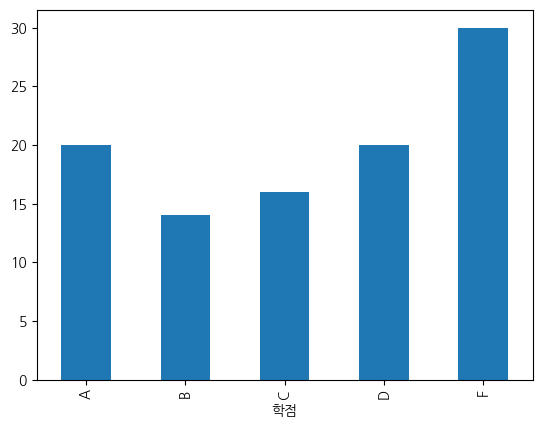

In [157]:
# 각 학점당 숫자를 그래프로
df_ex1['학점'].value_counts().sort_index(ascending=False).plot(kind='bar')